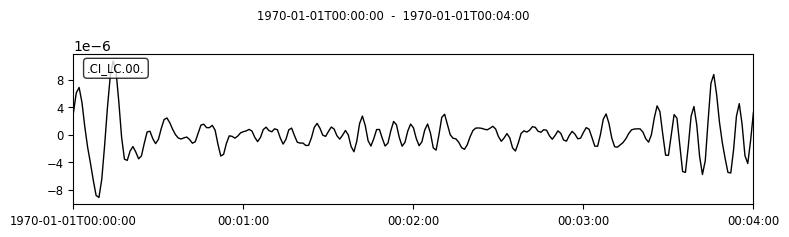

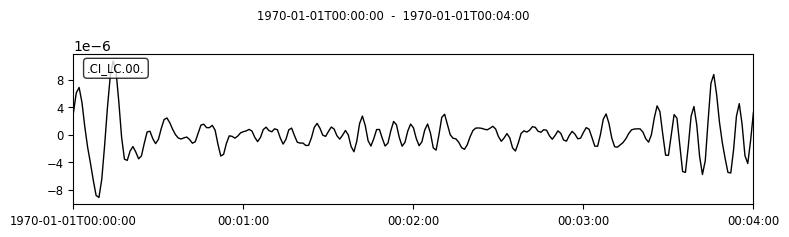

In [27]:
######## GNSS to mseed conversion including cycle slip correction ##################


from obspy import UTCDateTime 
from obspy import Trace
from obspy import Stream
from obspy import read, read_inventory
from obspy.signal.cross_correlation import correlate

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as colors
import matplotlib.cm as cmx
import datetime
import ruptures as rpt
import changefinder
#import changepoint 

        
# LOOP OVER STATIONS ANF CREAT CHANNEL STREAMS
st = Stream()
#"01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16","14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30"
for doy in ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30"]:
    tr = read(f"/gps/MSnoise_parent/MSnoise/STACKS/03/030_DAYS/ZZ/CI_LCG_CI_MTP/2022-01-{doy}.MSEED")
    #tr.plot()
    st += tr
st.stack(group_by='all', stack_type=('linear')) #('pw',2)('linear')
st.plot()

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from obspy import read
from scipy.signal import hilbert
from obspy import UTCDateTime 
from obspy import Trace
from obspy import Stream
from obspy import read, read_inventory
from obspy.signal.cross_correlation import correlate


# Gte the coherence of input stream.
def PWS(st, v, sm=False, sl=15):
    m = len(st)
    n = st[0].stats.npts
    dt = st[0].stats.delta
    t = np.arange(n) * dt
    c = np.zeros(n, dtype=complex)
    for i, tr in enumerate(st):
        h = hilbert(tr.data)
        c += h/abs(h)
    c = abs(c/m)
    if sm:
        operator = np.ones(sl) / sl
        c = np.convolve(c, operator, 'same')
    stc = st.copy()
    stc.stack()
    stc.plot()
    tr = stc[0]
    tr.data = tr.data*c**v
    st1 += tr
    return st1

v=2
st = Stream()
#"01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16","14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30"
for doy in ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30"]:
    tr1 = read(f"/gps/MSnoise_parent/MSnoise/STACKS/03/010_DAYS/ZZ/IV_LFRS_IV_P800/2022-01-{doy}.MSEED")
    st += tr1
stc.plot()
tr.plot()

IndexError: Empty stream object

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from obspy import read
from scipy.signal import hilbert

# Gte the coherence of input stream.
def get_coh(st, v, sm=False, sl=20):
    m = len(st)
    n = st[0].stats.npts
    dt = st[0].stats.delta
    t = np.arange(n) * dt
    ht = np.zeros((m, n), dtype=complex)
    c = np.zeros(n)
    for i, tr in enumerate(st):
        ht[i] = hilbert(tr.data)
    pha = ht / abs(ht)
    for i in range(n):
        c[i] = abs( sum(pha[:, i]) )
    # Smooth the coherence if necessary.
    if sm:
        c = np.convolve(c/m, np.ones(sl)/sl, 'same') ** v
    else:
        c = ( c/m ) ** v
    return t, c
st = Stream()
#"01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16","14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30"
for doy in ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30"]:
    tr = read(f"/gps/MSnoise_parent/MSnoise/STACKS/03/010_DAYS/ZZ/CI_LCG_IV_LFRS/2022-01-{doy}.MSEED")
    st += tr
st.stack(group_by='all', stack_type=('pw',3)) #('pw',2)('linear')
st.plot()
v = 2
st = read()
st.filter('bandpass', freqmin=2.5, freqmax=5, corners=4, zerophase=True)
d1 = st[0].data.copy()
st[0].data = d1 + np.random.randn(len(d1))*d1.max()*0.05
st[1].data = d1 + np.random.randn(len(d1))*d1.max()*0.10
st[2].data = d1 + np.random.randn(len(d1))*d1.max()*0.20

t, c = get_coh(st, v)

plt.figure(figsize=(8, 6))
plt.subplot(411)
plt.plot(t, st[0].data, lw=1, color='r', label='+%5 noise')
plt.legend(loc='upper right')
plt.subplot(412)
plt.plot(t, st[1].data, lw=1, color='g', label='+%10 noise')
plt.legend(loc='upper right')
plt.subplot(413)
plt.plot(t, st[2].data, lw=1, color='b', label='+%20 noise')
plt.legend(loc='upper right')
plt.subplot(414)
plt.plot(t, c, lw=1, color='k')
plt.tight_layout()
plt.show()